In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


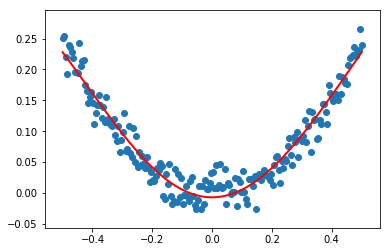

In [4]:
# 使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5, 200)[:, np.newaxis]
noise = np.random.normal(0,0.02, x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义神经网络中间曾
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# loss
loss = tf.reduce_mean(tf.square(prediction-y))
# optimizer
train = tf.train.GradientDescentOptimizer(.2).minimize(loss)
# init
with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2001):
        sess.run(train, feed_dict={x:x_data, y:y_data})
        
    
    # 获得预测值
    prediction_value=sess.run(prediction, feed_dict={x:x_data})
    
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=2)
    plt.show()

